In [1]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path = r"C:\Users\HP\OneDrive\Desktop\sign_data\train"
test_path = r"C:\Users\HP\OneDrive\Desktop\sign_data\test"

In [3]:
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=15

In [4]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 510, 510, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 253, 253, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 124, 124, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │              

 Total params: 6,884,034 (26.26 MB)

 Trainable params: 6,881,026 (26.25 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

In [7]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,)

In [8]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\HP\OneDrive\Desktop\sign_data\train',
                                                     target_size=Image_Size,
                                              batch_size=32,
                                              class_mode = 'categorical')

Found 1445 images belonging to 2 classes.


In [9]:
# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
test_generator = test_datagen.flow_from_directory(r'C:\Users\HP\OneDrive\Desktop\sign_data\test',
                                                  target_size=Image_Size,
                                                  batch_size = 32,
                                                  class_mode='categorical')

Found 316 images belonging to 2 classes.


In [11]:
epochs = 5
history = model.fit(train_generator,
                               epochs=epochs,  
                              validation_data=test_generator,    
                               validation_steps=len(test_generator),                                   
                             steps_per_epoch=len(train_generator),     
                             callbacks=callbacks)   

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3313s 72s/step - accuracy: 0.7271 - loss: 0.7293 - val_accuracy: 0.4557 - val_loss: 2.0235 - learning_rate: 0.0010
Epoch 2/5


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3058s 67s/step - accuracy: 0.9097 - loss: 0.2199 - val_accuracy: 0.4557 - val_loss: 9.1893 - learning_rate: 0.0010
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2964s 65s/step - accuracy: 0.9277 - loss: 0.1762 - val_accuracy: 0.4557 - val_loss: 14.4152 - learning_rate: 0.0010
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3331s 73s/step - accuracy: 0.9550 - loss: 0.1195 - val_accuracy: 0.4557 - val_loss: 5.5233 - learning_rate: 0.0010
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3502s 75s/step - accuracy: 0.9464 - loss: 0.1519 - val_accuracy: 0.4557 - val_loss: 13.8384 - learning_rate: 0.0010


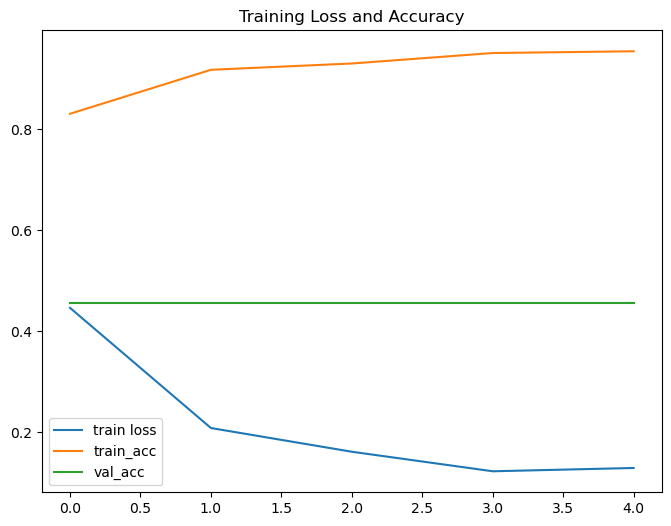

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy") 
plt.legend()  
plt.show()
plt.savefig('lossval_loss')

In [13]:
from tensorflow.keras.models import load_model
model.save('forge_real_signature_model.h5')

In [14]:
pred = model.predict(test_generator)
pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


array([[1.79979176e-12, 1.00000000e+00],
       [5.89537186e-12, 1.00000000e+00],
       [1.21664625e-12, 1.00000000e+00],
       [2.14936532e-12, 1.00000000e+00],
       [1.51365327e-11, 1.00000000e+00],
       [3.73606484e-12, 1.00000000e+00],
       [4.61092831e-11, 1.00000000e+00],
       [8.66674733e-13, 1.00000000e+00],
       [5.76417993e-12, 1.00000000e+00],
       [7.88793163e-12, 1.00000000e+00],
       [1.46765607e-12, 1.00000000e+00],
       [5.87527639e-13, 1.00000000e+00],
       [9.32275177e-12, 1.00000000e+00],
       [1.07486665e-12, 1.00000000e+00],
       [2.02561839e-12, 1.00000000e+00],
       [8.24482626e-13, 1.00000000e+00],
       [3.75107367e-12, 1.00000000e+00],
       [3.22735502e-12, 1.00000000e+00],
       [7.32813658e-13, 1.00000000e+00],
       [1.23330491e-12, 1.00000000e+00],
       [9.73557281e-13, 1.00000000e+00],
       [4.19105506e-12, 1.00000000e+00],
       [7.04711788e-13, 1.00000000e+00],
       [1.17500204e-12, 1.00000000e+00],
       [1.292622

In [15]:
import numpy as np

pred = np.argmax(pred, axis=1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
model = load_model('forge_real_signature_model.h5')

In [17]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\HP\OneDrive\Desktop\sign_data\test\Forged\049_forg\01_0114049.PNG", target_size=(512,512))


In [18]:
x = image.img_to_array(img)
x

array([[[245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.],
        ...,
        [245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.]],

       [[245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.],
        ...,
        [245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.]],

       [[245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.],
        ...,
        [245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.]],

       ...,

       [[245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.],
        ...,
        [245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.]],

       [[245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.],
        ...,
        [245., 253., 253.],
        [245., 253., 253.],
        [245., 253., 253.]],

       [[245., 253., 253.],
        [245., 253., 253.],
        [245., 2

In [19]:
x.shape

(512, 512, 3)

In [20]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 512, 512, 3)

In [21]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


array([[1.0000000e+00, 1.2510375e-36]], dtype=float32)

In [22]:
a = np.argmax(model.predict(img_data), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [23]:
if(a==1):
    print("The signature is real")
else:
    print("The signature is forged")

The signature is forged
